In [1]:
import numpy as np
import scanpy as sc
import h5py
from mofapy2.run.entry_point import entry_point

# MOFA 2

## Load the datasets

In [ ]:
#todo
gdown.download(
    'https://drive.google.com/uc?id=1i5Yj7Hh6ZYn9MpJ5hikOqA-SvnYK4zvQ',
    '10xpbmc10k2020-expressions.h5ad'
)

In [3]:
scrna = sc.read('../data/10xpbmc10k-2020/expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 10000 × 4000
    obs: 'cell_type'
    layers: 'count'

In [ ]:
#todo

In [5]:
scatac = sc.read('../data/10xpbmc10k-2020/peaks.h5ad')
scatac

AnnData object with n_obs × n_vars = 10000 × 40086
    obs: 'cell_type'
    layers: 'binary'

## Configure and train the model

In [6]:
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [7]:
ent.set_data_options(
    scale_groups = False, 
    scale_views = False
)

In [8]:
ent.set_data_matrix([[scrna.X.A], [scatac.X.A]], views_names=['scRNA', 'scATAC'])

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group2, ..., sampleN_groupG

Successfully loaded view='scRNA' group='group0' with N=10000 samples and D=4000 features...
Successfully loaded view='scATAC' group='group0' with N=10000 samples and D=40086 features...




In [9]:
ent.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)

Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (scRNA): gaussian
- View 1 (scATAC): gaussian




In [10]:
ent.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = False, 
    verbose = False, 
    seed = 1
)

In [11]:
ent.build()

In [12]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -533850218.28 

Iteration 1: time=672.13, ELBO=-49477990.65, deltaELBO=484372227.623 (90.73185906%), Factors=19
Iteration 2: time=644.57, ELBO=-44371611.02, deltaELBO=5106379.638 (0.95651916%), Factors=18
Iteration 3: time=610.36, ELBO=-43409403.10, deltaELBO=962207.917 (0.18023930%), Factors=17
Iteration 4: time=576.94, ELBO=-43123431.40, deltaELBO=285971.703 (0.05356778%), Factors=16
Iteration 5: time=546.21, ELBO=-42911821.08, deltaELBO=211610.312 (0.03963852%), Factors=15
Iteration 6: time=514.08, ELBO=-42748260.83, deltaELBO=163560.253 (0.03063785%), Factors=14
Iteration 7: time=479.70, ELBO=-42631894.62, deltaELBO=116366.212 (0.02179754%), Factors=13
Iteration 8: time=469.61, ELBO=-42583589.56, deltaELBO=48305.058 (0.00904843%), Factors=13
Iteration 9: time=469.84, ELBO=-42547079.32, deltaELBO=36510.238 (0.00683904%), Factors=13
Iteration 10

In [13]:
outfile = '10xpbmc10k-mofa2.hdf5'
ent.save(outfile)

Saving model in 10xpbmc10k-mofa2.hdf5...


## Save results as AnnData

In [14]:
f = h5py.File(outfile)

In [15]:
z = np.concatenate([v[:,:] for k, v in f['expectations']['Z'].items()], axis=1).T
z = sc.AnnData(z)

z.obs_names = scrna.obs_names
z.obs = scrna.obs

z

AnnData object with n_obs × n_vars = 10000 × 13
    obs: 'cell_type'

In [16]:
z.write('../data/integrated/mofa/10xpbmc10k-mofa.h5ad')

In [17]:
!rm '10xpbmc10k2020-expressions.h5ad'
!rm '10xpbmc10k2020-peaks.h5ad'
!rm '10xpbmc10k-mofa2.hdf5'

rm: cannot remove '10xpbmc10k2020-expressions.h5ad': No such file or directory
rm: cannot remove '10xpbmc10k2020-peaks.h5ad': No such file or directory


## Visualize results

In [18]:
sc.pp.neighbors(z)
sc.tl.umap(z)

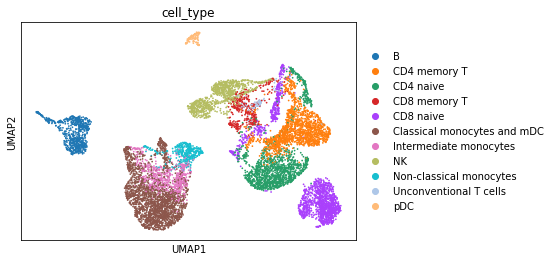

In [20]:
sc.pl.umap(z, color='cell_type')